# The Game of Life

## Brendan Baron

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import random
import time



'''
The object of this game is to determine each cells state depending on the surrounding cells.
The process is the 8 neighbors of each cell are added together and the sum determines the future
state of the curret cell
'''

class Game_Of_Life(object):
    
    def __init__(self, size):
        #initializes a length and width for the grid and initializes the figure that will be used.
        self.size  = size
        self.fig= plt.figure()
       

        
    def step(self,cells):
        #create the replacement array with equal lengths and every value = 0
        new_cells = [[0 for _ in range(len(cells[0]))] for _ in range(len(cells))]
        for i in range(len(cells)):
            for j in range(len(cells[i])):
                
                #Each i and j variable will be crucial in determining
                #where we are on the board and when the periodic
                #boundary will matter
                prev_i= i-1
                prev_j = j-1
            
                #if i == len(cells) - 1:
                next_i = (i +1)% self.size
                #else:
                 #   next_i = i+1
                #if j == len(cells[i]) -1:
                next_j = (j+1) % self.size
                #else:
                   # next_j = j+1
                
                #Neighbor sum takes each of the variables we made and is able to find
                #each surrounding square quickly and efficiently
                neighbor_sum = (cells[prev_i][prev_j] + cells[prev_i][j] + cells[prev_i][next_j]
                + cells[i][prev_j] + cells[i][next_j]
                + cells[next_i][prev_j] + cells[next_i][j] + cells[next_i][next_j])
                
                #This last statement is where the rules of the game of life are 
                #implemented and tested for each cell in the grid
                if cells[i][j] == 1:
                    if neighbor_sum < 2 or neighbor_sum > 3: 
                        new_cells[i][j] = 0
                    else:
                        new_cells[i][j] = 1         
                else:
                    if neighbor_sum == 3:
                        new_cells[i][j] = 1
                
        return new_cells
            

    
    def evolve(self, times, userInType, color_scheme):
        if(userInType == 'random'):
            cells = [[random.randint(0,1) for x in range(self.size)] for w in range(self.size)]
    
        
        #Run this code to create an n sized grid with a glider only in the top left
        if(userInType == 'glider'):
            cells = [[0 for x in range(self.size)] for w in range(self.size)]
            glider = [[0,0,0,0,0],
            [0,0,1,0,0],
            [1,0,1,0,0],
            [0,1,1,0,0], 
            [0,0,0,0,0]]
            for i in range(len(glider)):
                for j in range(len(glider[i])):
                    cells[i][j] = glider[i][j]
       
        #GLIDER GUN
    
        if(userInType == 'glider gun'):
        
            cells = [[0 for x in range(self.size)] for w in range(self.size)]
            gun = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
            [0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
            [1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
            
            for i in range(len(gun)):
                for j in range(len(gun[i])):
                    cells[i+30][j+30] = gun[i][j]
        
        stamped_cells = [cells]
        
        #Figures work in subplots, the argument is a coordinate without commas
        ax = self.fig.add_subplot(111)
        #makes all figures interactive
        plt.ion()
        for i in range(times):
            #Pause the code for a second
            time.sleep(.1)
            #Add to stamped cells the next step in the game
            stamped_cells.append(self.step(stamped_cells[i]))
            #On the axis, you would use imshow for the array, the first element is the 0th step, 
            #second is the second, etc.
            ax.imshow(stamped_cells[i], cmap = color_scheme)
            #Turns off the axis labels
            ax.axis('off')
            #Show the figure, but it isnt needed with the draw function
            #self.fig.show()
            #Force the figure to draw each time
            self.fig.canvas.draw()
    
    
    
    



Welcome to the Game of Life. What grid size would you like(5 = 5x5)? :100
And how many times would you like to evolve the Game? : 10
Annnnddd would you like a glider, a random board, or a glider gun? :random
Finally, what colormap do you want(use google I have the time):magma


<IPython.core.display.Javascript object>


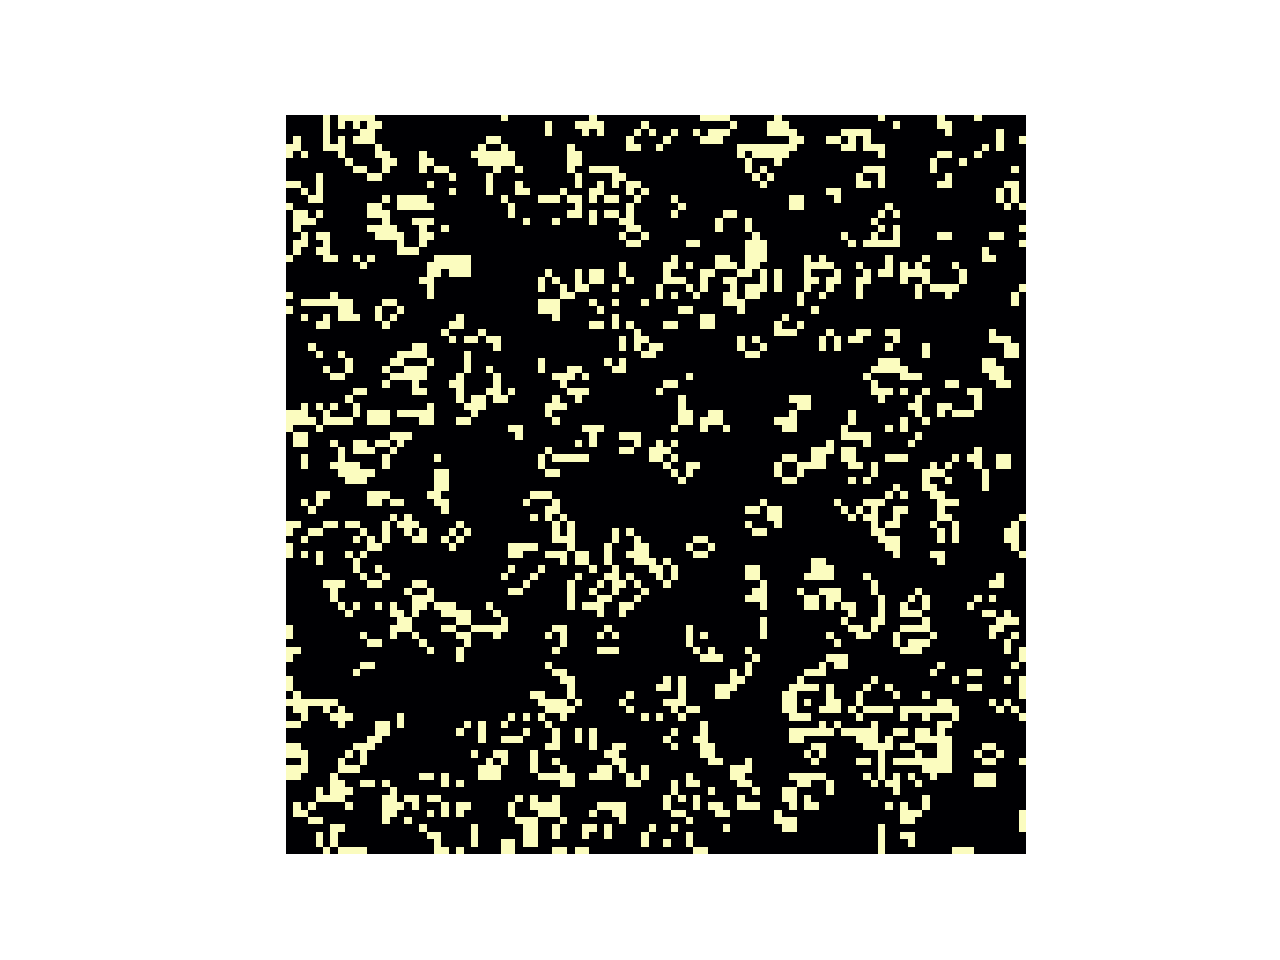

In [2]:
def main():
    try:
        grid_size  = int(input('Welcome to the Game of Life. What grid size would you like(5 = 5x5)? :'))
        
        
        times = int(input('And how many times would you like to evolve the Game? : '))

        
        user_in = str(input('Annnnddd would you like a glider, a random board, or a glider gun? :'))
        
        colormap = str(input('Finally, what colormap do you want(use google I have the time):'))
        
        gol = Game_Of_Life(grid_size)
        gol.evolve(times,user_in, colormap)
        
    except ValueError:
        print('Not what I asked for moron.')

        
if __name__ == '__main__':
    main()